In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import os
import pandas as pd
import seaborn as sns
from datetime import datetime
from scipy import stats

mpl.rcParams['figure.figsize'] = (18, 6)
mpl.rcParams['axes.grid'] = False

In [11]:
evo_data = pd.read_csv(r'data/demand_datasets/evo_demand.csv', index_col=0)
modo_data = pd.read_csv(r'data/demand_datasets/modo_demand.csv', index_col=0)
c2g_data = pd.read_csv(r'data/demand_datasets/c2g_demand.csv', index_col=0)


evo_data.index = pd.to_datetime(evo_data.index)
modo_data.index = pd.to_datetime(modo_data.index)
c2g_data.index = pd.to_datetime(c2g_data.index)

evo_data = evo_data.travels
modo_data = modo_data.travels
c2g_data = c2g_data.travels

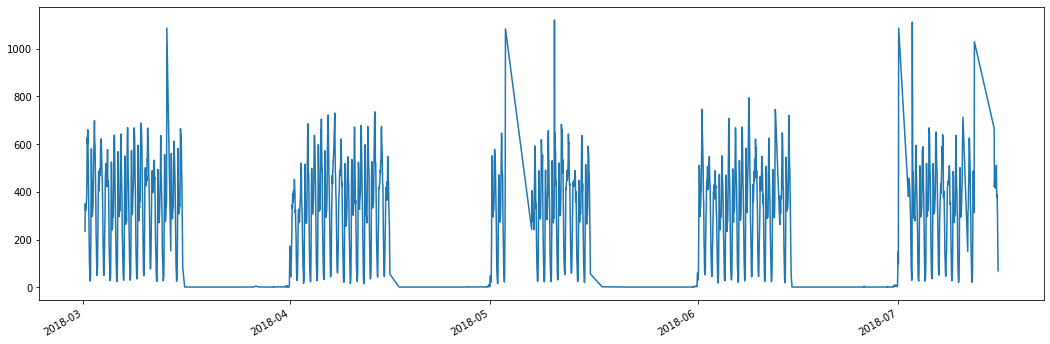

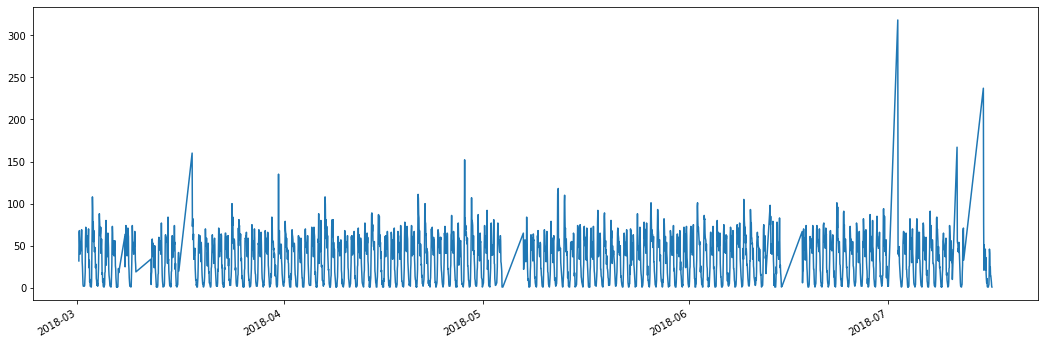

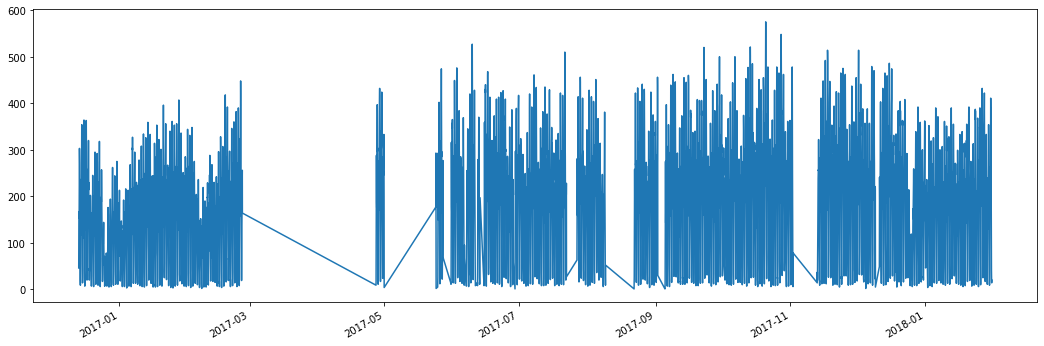

In [23]:
evo_data.plot()
plt.show()
modo_data.plot()
plt.show()
c2g_data.plot()
plt.show()

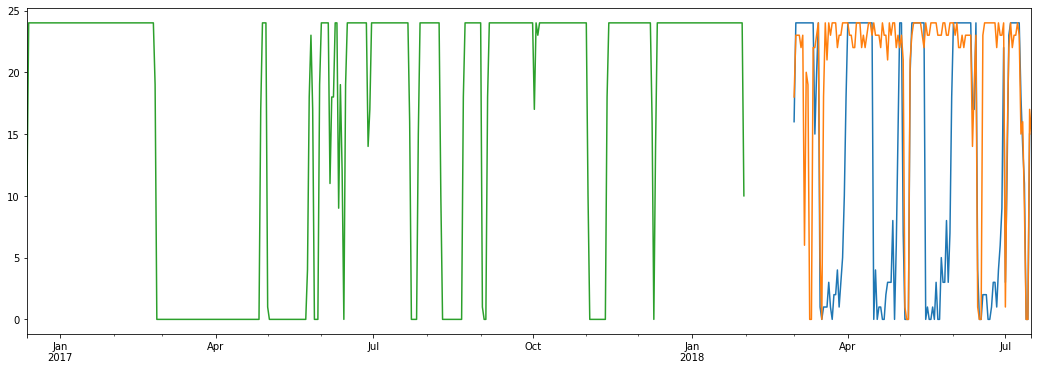

In [25]:
evo_days = evo_data.groupby(pd.Grouper(freq='D')).count()
modo_days = modo_data.groupby(pd.Grouper(freq='D')).count()
c2g_days = c2g_data.groupby(pd.Grouper(freq='D')).count()

evo_days.plot()
modo_days.plot()
c2g_days.plot()

In [88]:
def search_best_sequence(series, threshold):
    valid_series = series >= threshold
    sequences = (~valid_series).cumsum()[valid_series]
    best_days_id = sequences.value_counts().index[0]
    best_days = sequences[sequences == best_days_id].index
    return best_days

In [89]:
threshold = 24
best_evo_days = search_best_sequence(evo_days, threshold)
best_c2g_days = search_best_sequence(c2g_days, threshold)
best_modo_days = search_best_sequence(modo_days, threshold)

print(f"With the threshold of {threshold} hours of data, the best sequences of each dataset are:")
print(f"Modo - Length: {len(best_modo_days)} - Dates: {best_modo_days[0]} - {best_modo_days[-1]}.")
print(f"Car2Go - Length: {len(best_c2g_days)} - Dates: {best_c2g_days[0]} - {best_c2g_days[-1]}.")
print(f"Evo - Length: {len(best_evo_days)} - Dates: {best_evo_days[0]} - {best_evo_days[-1]}.")

With the threshold of 24 hours of data, the best sequences of each dataset are:
Modo - Length: 7 - Dates: 2018-06-19 00:00:00 - 2018-06-25 00:00:00.
Car2Go - Length: 73 - Dates: 2016-12-14 00:00:00 - 2017-02-24 00:00:00.
Evo - Length: 15 - Dates: 2018-04-01 00:00:00 - 2018-04-15 00:00:00.
